<a href="https://colab.research.google.com/github/AI-ML-DL-EXPERT/Customer-Churn-Prediction-Using-DL/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import and Upload the dataset from Kaggle

In [1]:
# Upload your Kaggle API Token

!mkdir -p ~/.kaggle/

# Here /content/Kaggle API Token/kaggle.json this is the path of the Kaggle API Tok
!cp "/content/Kaggle API Token/kaggle.json" ~/.kaggle/

In [ ]:
!kaggle datasets download -d rjmanoj/credit-card-customer-churn-prediction

credit-card-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/credit-card-customer-churn-prediction.zip", "r")

zip_ref.extractall("/content/Dataset/")
zip_ref.close()

## Working on the Dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Dataset/Churn_Modelling.csv")

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
x = df.drop(columns = ["Exited"])
y = df["Exited"]

In [ ]:
x.shape

(10000, 11)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(11, activation = "sigmoid", input_dim = 11))
model.add(Dense(11, activation = "sigmoid"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics = ["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 4s 11ms/step - loss: 0.5161 - accuracy: 0.7972 - val_loss: 0.5050 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 2s 10ms/step - loss: 0.5037 - accuracy: 0.7972 - val_loss: 0.5017 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 2s 8ms/step - loss: 0.5018 - accuracy: 0.7972 - val_loss: 0.4995 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 1s 7ms/step - loss: 0.5010 - accuracy: 0.7972 - val_loss: 0.4994 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.5008 - accuracy: 0.7972 - val_loss: 0.4978 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5000 - accuracy: 0.7972 - val_loss: 0.4971 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4991 - accuracy: 0.7972 - val_loss: 0.4974 - val_accuracy: 0.79

In [ ]:
y_pred = model.predict(x_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.14316075],
       [0.24683803],
       [0.14316075],
       ...,
       [0.14316075],
       [0.24602774],
       [0.24683803]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis = -1)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.7925

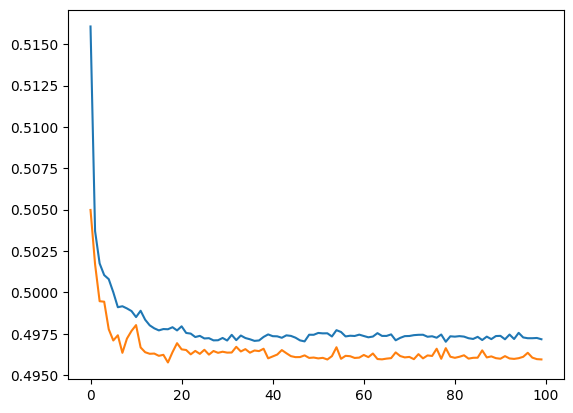

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

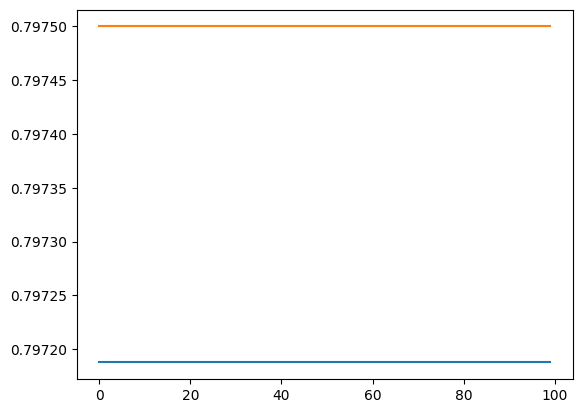

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])